In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import tree
from itertools import chain

In [42]:
train= pd.read_csv('combinedDataset.csv')
train.head()
list_cols = list(v for v in chain(train.columns[6:9]))
df = train[list_cols]
df.head()
train.head()

,FIPS,N02650,A02650,"Population Estimate, 2013","Population Estimate, 2016",PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,FFR14,RECFAC14
0,1001,34230.0,1659673.0,"54,792","55,416",13.0,34.1,36,5
1,1003,90660.0,5118057.0,"195,147","208,563",10.4,27.4,132,25
2,1005,11480.0,446600.0,"26,938","25,965",18.4,44.4,22,0
3,1007,23170.0,1124762.0,"22,501","22,643",14.8,40.3,5,1
4,1009,63020.0,3023206.0,"57,746","57,704",14.1,34.6,21,3


In [43]:
#obesity vs income, diabetes rate, ff, rc
l = list(v for v in chain(train.columns[5:7], train.columns[7:9]))
train_images = train[l]
train_labels = train.iloc[:,2]
train_images.head()
train_labels.head()

0    1659673.0
1    5118057.0
2     446600.0
3    1124762.0
4    3023206.0
Name: A02650, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_images, train_labels, test_size = 0.25)

In [45]:
rf = RandomForestRegressor(n_estimators = 1, criterion = 'mse', max_features = 2,
                               min_samples_split = 2, min_samples_leaf = 1, random_state = None)
rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

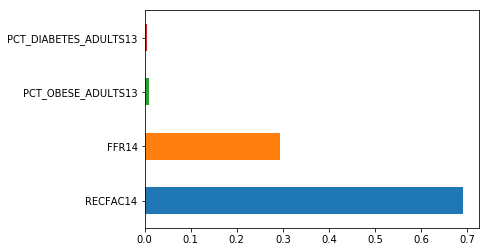

In [46]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')